In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.images import Images

In [2]:
path_metadata = '../../Metadata/'
path_images = "../../VarroaDataset/"

In [3]:
metadata = pd.read_csv(path_metadata+'metadataVarroa.csv')
metadata['image'] = metadata['image'].apply(lambda x: path_images+x)
metadata.head()

,image,label
0,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,0
1,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,1
2,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,0
3,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,1
4,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,0


In [4]:
imgs_saudavel = metadata[metadata['label'] == 0]
imgs_saudavel.index = [i for i in range(len(imgs_saudavel))]
imgs_saudavel

,image,label
0,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,0
1,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,0
2,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,0
3,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,0
4,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,0
...,...,...
9557,../../VarroaDataset/2017-10-17_16-41-10.mp4-be...,0
9558,../../VarroaDataset/2017-10-17_16-41-10.mp4-be...,0
9559,../../VarroaDataset/2017-10-17_16-41-10.mp4-be...,0
9560,../../VarroaDataset/2017-10-17_16-41-10.mp4-be...,0


In [5]:
imgs_infectada = metadata[metadata['label'] == 1]
imgs_infectada.index = [i for i in range(len(imgs_infectada))]
imgs_infectada

,image,label
0,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,1
1,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,1
2,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,1
3,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,1
4,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,1
...,...,...
3942,../../VarroaDataset/2017-10-17_16-41-10.mp4-be...,1
3943,../../VarroaDataset/2017-10-17_16-41-10.mp4-be...,1
3944,../../VarroaDataset/2017-10-17_16-41-10.mp4-be...,1
3945,../../VarroaDataset/2017-10-17_16-41-10.mp4-be...,1


In [6]:
imgs_selected = pd.concat([imgs_saudavel.loc[:2999], imgs_infectada.loc[:2999]])
imgs_selected.sort_values(by='image', inplace=True)
imgs_selected.index = [i for i in range(len(imgs_selected))]
imgs_selected.head()

,image,label
0,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,0
1,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,1
2,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,0
3,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,1
4,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,0


In [7]:
imgs_selected['label'].value_counts()

0    3000
1    3000
Name: label, dtype: int64

In [8]:
imgs = Images(imgs_selected)

6000 imagens carregadas
3000 infectadas
3000 saudáveis


In [9]:
imgs.normalize()

  0%|          | 0/6000 [00:00<?, ?it/s]

In [10]:
imgs.equalize()

  0%|          | 0/6000 [00:00<?, ?it/s]

In [11]:
imgs.filter_median()

  0%|          | 0/6000 [00:00<?, ?it/s]

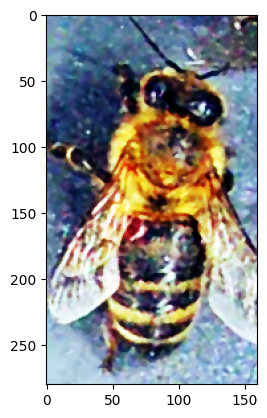

In [12]:
plt.imshow(imgs.imgs_processed[1])

In [13]:
imgs.segment()

  0%|          | 0/6000 [00:00<?, ?it/s]

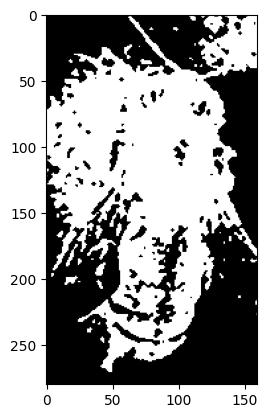

In [14]:
plt.imshow(imgs.masks[1], cmap='gray')

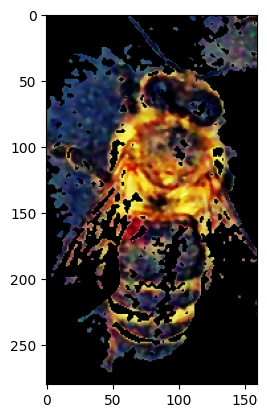

In [15]:
plt.imshow(imgs.imgs_segmented[1])